In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



Grc_df = pd.read_csv('Grocery_dataset.csv')  

# Amount of rows and columns
print(f"Amount rows: {Grc_df.shape[0]}")
print(f"Amount columns: {Grc_df.shape[1]}")

# 10 first rows
print("First 10 rows:")
print(Grc_df.head(10))

# Last 10 rows
print("Last 10 rows:")
print(Grc_df.tail(10))

Amount rows: 5000
Amount columns: 12
First 10 rows:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6

In [ ]:
#2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Grc_df = pd.read_csv('Grocery_dataset.csv')  



print("Null values in each column:")
print(Grc_df.isnull().sum())



numerical_columns = Grc_df.select_dtypes(include=['float64', 'int64']).columns
Grc_df[numerical_columns] = Grc_df[numerical_columns].fillna(Grc_df[numerical_columns].mean())

# Filling in null values for categorical columns
categorical_columns = Grc_df.select_dtypes(include=['object']).columns
Grc_df[categorical_columns] = Grc_df[categorical_columns].fillna(Grc_df[categorical_columns].mode().iloc[0])

# Displaying after handling null values
print("Null values after handling:")
print(Grc_df.isnull().sum())



Null values in each column:
Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Null values after handling:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [28]:
# 3

# Amount of unique values
unique_outlet_sizes = Grc_df['Outlet_Size'].value_counts()
print("Unike Outlet Sizes og deres antall:")
print(unique_outlet_sizes)

# Makximum and minimum
max_size = unique_outlet_sizes.idxmax()
min_size = unique_outlet_sizes.idxmin()
print(f"Biggest Outlet Size: {max_size}")
print(f"Smallest Outlet Size: {min_size}")

Unike Outlet Sizes og deres antall:
Outlet_Size
Medium    3044
Small     1398
High       558
Name: count, dtype: int64
Biggest Outlet Size: Medium
Smallest Outlet Size: High


In [ ]:
#4


print(Grc_df['Item_Fat_Content'].unique())
print(f"The amount of different types are")
Grc_df['Item_Fat_Content'].nunique()




['Low Fat' 'Regular']
The amount of different types are


2

In [79]:
#5
#Dropping columns based on column index
Grc_new_df = Grc_df.drop(Grc_df.columns[[0, 6]], axis=1)


In [ ]:
#6


# Filtering rows where 'Outlet_Type' is 'Supermarket Type1' and 'Supermarket Type2'
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type2']

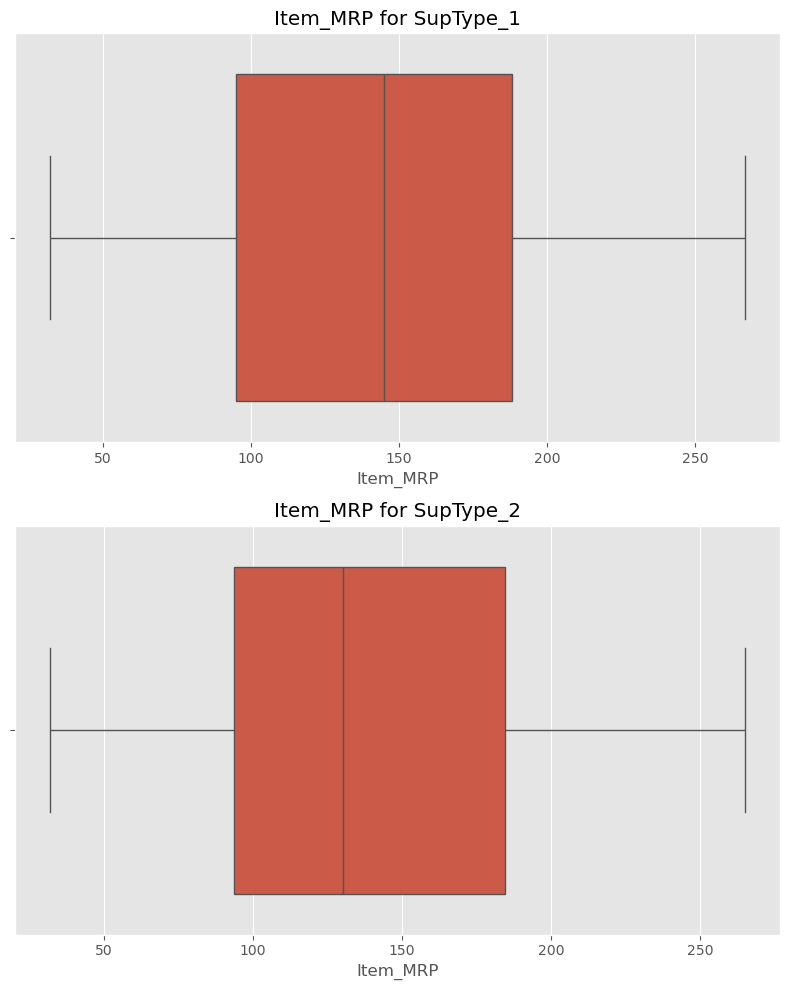

In [ ]:
#7

import matplotlib.pyplot as plt
import seaborn as sns

# Sett ggplot style
plt.style.use('ggplot')

# Opprett figur og subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Boxplot for SupType_1
sns.boxplot(ax=axes[0], x='Item_MRP', data=SupType_1)
axes[0].set_title('Item_MRP for SupType_1')

# Boxplot for SupType_2
sns.boxplot(ax=axes[1], x='Item_MRP', data=SupType_2)
axes[1].set_title('Item_MRP for SupType_2')

plt.tight_layout()
plt.show()

#item 1 has a higher mrp


In [ ]:
#8

# Concatenating SupType_1 and SupType_2 DataFrames into a new DataFrame
Grc_Concat_df = pd.concat([SupType_1, SupType_2])

# Sorting the concatenated DataFrame in ascending order based on 'Item_Outlet_Sales'
Grc_Concat_df.sort_values(by='Item_Outlet_Sales', inplace=True)
Grc_Concat_df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].min().idxmin()



'Tier 3'

In [ ]:
#9

# This code sets a multi-level index using 'Outlet_Size' and 'Outlet_Location_Type' columns
Grc_Concat_df.set_index(['Outlet_Size', 'Outlet_Location_Type'], inplace=True)

# Prints new index of the concatenated DataFrame
print(Grc_Concat_df.index)

MultiIndex([(  'High', 'Tier 3'),
            ('Medium', 'Tier 3'),
            ('Medium', 'Tier 3'),
            ('Medium', 'Tier 2'),
            ( 'Small', 'Tier 1'),
            ('Medium', 'Tier 1'),
            ( 'Small', 'Tier 2'),
            ('Medium', 'Tier 3'),
            ('Medium', 'Tier 3'),
            (  'High', 'Tier 3'),
            ...
            ( 'Small', 'Tier 2'),
            ( 'Small', 'Tier 1'),
            ( 'Small', 'Tier 1'),
            ('Medium', 'Tier 2'),
            ('Medium', 'Tier 2'),
            ('Medium', 'Tier 2'),
            ('Medium', 'Tier 2'),
            ('Medium', 'Tier 2'),
            ( 'Small', 'Tier 1'),
            (  'High', 'Tier 3')],
           names=['Outlet_Size', 'Outlet_Location_Type'], length=3854)


In [ ]:
#10
# This code cuts the 'Item_Weight' column into 10 equal-sized buckets (bins)
Grc_Concat_df['Item_Weight_Bucket'] = pd.cut(Grc_Concat_df['Item_Weight'], bins=10)

# Displays statistics (mean, min, max, count) for 'Item_Weight' within each bucket
print("Bucket statistics:")
print(Grc_Concat_df.groupby('Item_Weight_Bucket')['Item_Weight'].agg(['mean', 'min', 'max', 'count']))

Bucket statistics:
                         mean     min     max  count
Item_Weight_Bucket                                  
(4.538, 6.234]       5.623814   4.555   6.215    253
(6.234, 7.914]       7.121807   6.235   7.905    476
(7.914, 9.594]       8.761867   7.930   9.500    450
(9.594, 11.273]     10.344917   9.600  11.150    362
(11.273, 12.952]    12.081635  11.300  12.850    419
(12.952, 14.632]    13.716193  13.000  14.600    352
(14.632, 16.312]    15.495976  14.650  16.250    410
(16.312, 17.991]    17.172672  16.350  17.850    408
(17.991, 19.671]    18.838005  18.000  19.600    396
(19.671, 21.35]     20.357012  19.700  21.350    328


C:\Users\Tufa\AppData\Local\Temp\ipykernel_1468\3773646725.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(Grc_Concat_df.groupby('Item_Weight_Bucket')['Item_Weight'].agg(['mean', 'min', 'max', 'count']))
